In [72]:
%matplotlib inline
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [73]:
matplotlib.rcParams.update({'font.size':18}) 
matplotlib.rcParams.update({'font.family':'serif'})

Reading in files:

In [74]:
Kep_ID, Pair_ID, Gal_Prob, Photo_Dist, Pair_Dist = np.loadtxt ('kolby-data.txt', usecols=(0,1,2,3,4), unpack=True)

In [75]:
row, Lfl_Lbol, giclr, kicnum = np.genfromtxt('kic_lflare.csv', delimiter = ',', unpack = True)

x=np.where((Lfl_Lbol < 1e-15))
Lfl_Lbol[x]=1e-15

In [76]:
Kepler_ID, dist, sep, gi = np.genfromtxt('Kepler_WDS_Slowpokes.csv', usecols=(0,13,15,26), delimiter = ',', unpack = True)
#From 3/23/2017 updated candidate list 

In [77]:
NewKep_ID = np.append(Kep_ID,Kepler_ID) #Appending the updated list to old lists
NewPair_Dist = np.append(Pair_Dist,sep)
NewPhoto_Dist = np.append(Photo_Dist, dist)

In [78]:
len(NewKep_ID)

1673

Matching Datasets:

In [79]:
m = np.array(np.zeros(len(NewKep_ID)), dtype='int')

for k in range (len(NewKep_ID)):
    x = np.where((NewKep_ID[k] == kicnum))
    m[k] = x[0]
#     NewKep_ID == kicnum[x]
    
m
# in database speak, this a Join (Inner Join)
# NewKep_ID == kicnum[m]


array([132675, 132661, 144449, ..., 172657, 172657, 164000])

In [80]:
len(m)

1673

In [81]:
kicnum[m] == NewKep_ID

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

Distinguishing primary stars from secondary stars:

In [82]:
a = np.arange(0,1094,2)
b = np.arange(1,1094,2)

for j in range(0,len(a)):
    if giclr[m][a[j]] > giclr[m][b[j]]:
        tmp = a[j]
        a[j] = b[j]
        b[j] = tmp

Converting pair distances to AU:

In [83]:
AU_dist = NewPair_Dist/3600.*np.pi/180. * NewPhoto_Dist * 206265.
AU_cut = np.where(AU_dist < 120000)
print(np.mean(AU_dist[AU_cut]))

31009.031253


Filtering for minium flare luminosity, probability of chance alignment, and pair separation:

In [84]:
#GP_cut = 0.01
#FL_cut = 1e-6.5

In [85]:
Good_both_a2 = np.where((Lfl_Lbol[m][a]>1e-7)  & (Gal_Prob[a]>0.001) & (AU_dist[a] < 120000))
Good_both_b2 = np.where((Lfl_Lbol[m][b]>1e-7)  & (Gal_Prob[b]>0.001) & (AU_dist[b] < 120000))

Good_either2 = np.where(((Lfl_Lbol[m][a] > 1e-7) | (Lfl_Lbol[m][b] > 1e-7)) & 
                        ((Lfl_Lbol[m][a] > 1e-15) & (Lfl_Lbol[m][b] > 1e-15)) &
                        (Gal_Prob[a] < 0.01) & 
                        (AU_dist[a] < 120000))
print(np.size(Good_either2))

42


Output figures:

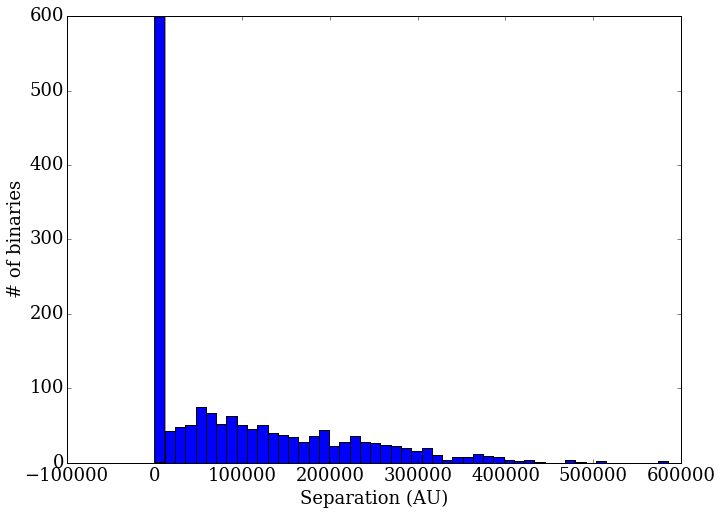

In [86]:
plt.figure(figsize=(11,8))
plt.hist(AU_dist, bins=50)
plt.xlabel('Separation (AU)')
plt.ylabel('# of binaries')
plt.savefig('PairDistances')

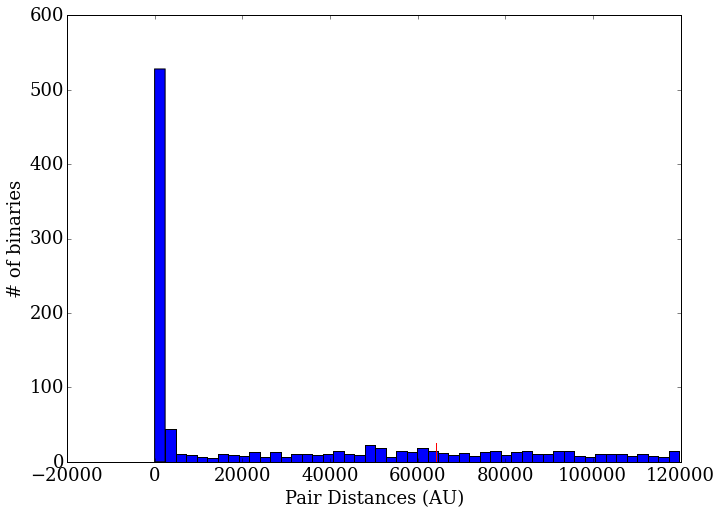

In [87]:
plt.figure(figsize=(11,8))
plt.hist((AU_dist[AU_cut]), bins = 50)
plt.plot([64088.9,64088.9],[0,25],'r')
plt.xlabel('Pair Distances (AU)')
plt.ylabel('# of binaries')
plt.savefig('AU_pairdist')

/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


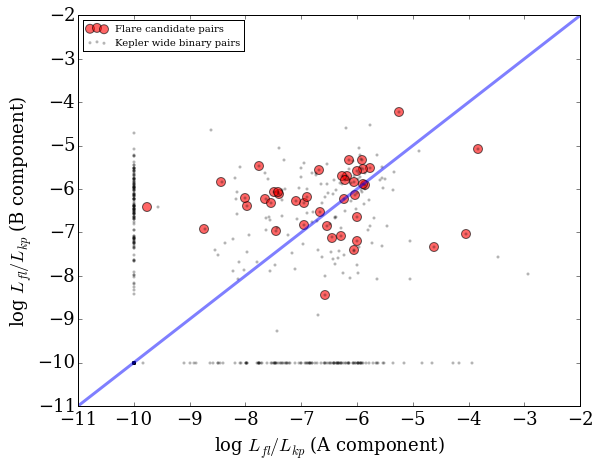

In [88]:
plt.figure(figsize=(9,7))

# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_a2]), np.log10(Lfl_Lbol[m][b][Good_both_a2]), 'ro', alpha = 0.6)
# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_b2]), np.log10(Lfl_Lbol[m][b][Good_both_b2]), 'bo', alpha = 0.6)
plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either2]), np.log10(Lfl_Lbol[m][b][Good_either2]), alpha = 0.6, s=80, 
            c='r', label='Flare candidate pairs')

# plt.text(-4,-3,'N=')

plt.scatter(np.log10(Lfl_Lbol[m][a]+1e-10), np.log10(Lfl_Lbol[m][b]+1e-10), s=5, c='k', alpha=0.2, 
            label='Kepler wide binary pairs')
plt.legend(fontsize=10, loc=2)

plt.plot([-11,-2], [-11,-2], lw=3, alpha=0.5)

plt.xlim(-11, -2)
plt.ylim(-11, -2)
plt.xlabel(r'log $L_{fl}/L_{kp}$ (A component)')
plt.ylabel(r'log $L_{fl}/L_{kp}$ (B component)')

plt.savefig('AB_new.png',dpi=500)

In [89]:
gi_redcut= np.where(giclr[m][a][Good_either2] <= np.median(giclr[m][a][Good_either2]))
gi_bluecut= np.where(giclr[m][a][Good_either2] > np.median(giclr[m][a][Good_either2]))                    
print(np.median(giclr[m][a][Good_either2]))

0.7055


In [90]:
np.size(gi_bluecut)

21

/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


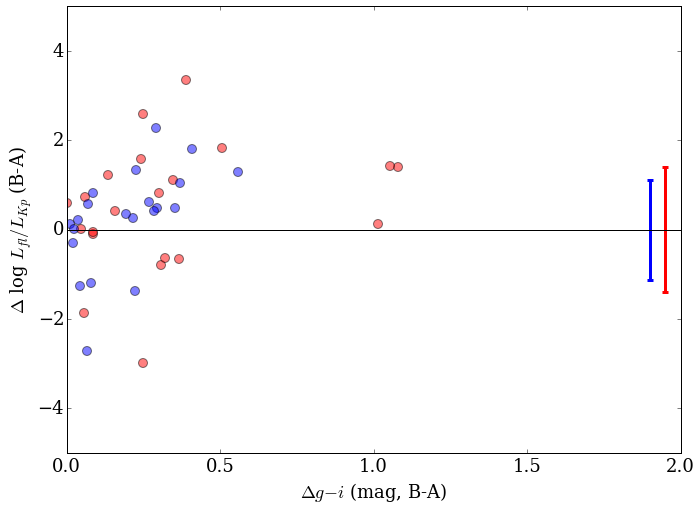

In [91]:
plt.figure(figsize=(11,8))
plt.scatter(giclr[m][b][Good_either2][gi_redcut] - giclr[m][a][Good_either2][gi_redcut],
            np.log10(Lfl_Lbol[m][b][Good_either2][gi_redcut]/Lfl_Lbol[m][a][Good_either2][gi_redcut]), 
            c='r', alpha=0.5,s=80)

plt.scatter(giclr[m][b][Good_either2][gi_bluecut] - giclr[m][a][Good_either2][gi_bluecut],
            np.log10(Lfl_Lbol[m][b][Good_either2][gi_bluecut]/Lfl_Lbol[m][a][Good_either2][gi_bluecut]),
            c='b', alpha=0.5,s=80)
plt.xlim(0,2)
plt.ylim(-5,  5)
plt.plot([-2,2],[0,0], color = 'k')
plt.xlabel('$\Delta g-i$ (mag, B-A)')
# plt.ylabel('[$L_{fl}/L_{kp}$ B] / [$L_{fl}/L_{kp}$A]')
plt.ylabel(r'$\Delta$ log $L_{fl}/L_{Kp}$ (B-A)' )
# plt.yscale('log')


redstd = np.std(np.log10(Lfl_Lbol[m][b][Good_either2][gi_redcut] / Lfl_Lbol[m][a][Good_either2][gi_redcut]))
plt.errorbar(1.95,0,redstd, color='r', ecolor='r', lw=3, mew=3)

bluestd = np.std(np.log10(Lfl_Lbol[m][b][Good_either2][gi_bluecut] / Lfl_Lbol[m][a][Good_either2][gi_bluecut]))
plt.errorbar(1.9,0,bluestd, color='b', ecolor='b', lw=3, mew=3)



plt.savefig('Color_diagram_v3',dpi=500)

In [92]:
lcurve1 = np.where(Lfl_Lbol[m][a][Good_either2] > 1e-4)

In [93]:
print(Lfl_Lbol[m][a][Good_either2][lcurve1])

[ 0.00014824]


In [94]:
print(Kep_ID[a][Good_either2][lcurve1],Kep_ID[b][Good_either2][lcurve1])

[ 5083330.] [ 5083480.]


In [95]:
print(Lfl_Lbol[a][Good_either2][lcurve1],Lfl_Lbol[b][Good_either2][lcurve1])

[  1.00000000e-15] [  1.00000000e-15]


In [96]:
lcurve2 = np.where(Lfl_Lbol[m][b][Good_either2] > 1e-5)

In [97]:
print(Lfl_Lbol[m][a][Good_either2][lcurve2],Lfl_Lbol[m][b][Good_either2][lcurve2])

[  5.56544926e-06] [  6.00367715e-05]


In [98]:
print(Kep_ID[a][Good_either2][lcurve2],Kep_ID[b][Good_either2][lcurve2])

[ 2834564.] [ 2834637.]


/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


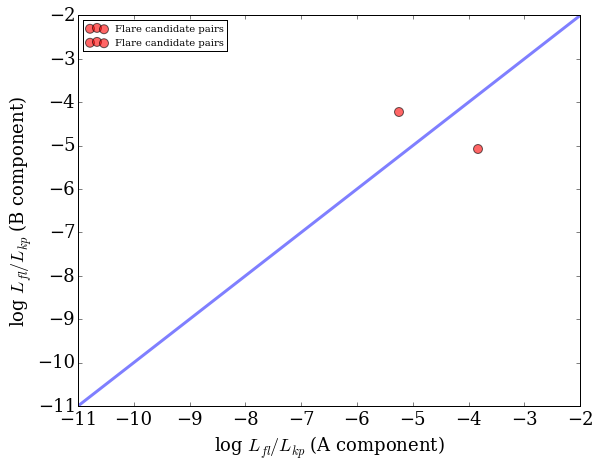

In [ ]:
plt.figure(figsize=(9,7))

# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_a2]), np.log10(Lfl_Lbol[m][b][Good_both_a2]), 'ro', alpha = 0.6)
# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_b2]), np.log10(Lfl_Lbol[m][b][Good_both_b2]), 'bo', alpha = 0.6)
plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either2][lcurve1]), np.log10(Lfl_Lbol[m][b][Good_either2][lcurve1]), alpha = 0.6, s=80, 
            c='r', label='Flare candidate pairs')

plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either2][lcurve2]), np.log10(Lfl_Lbol[m][b][Good_either2][lcurve2]), alpha = 0.6, s=80, 
            c='r', label='Flare candidate pairs')

# plt.text(-4,-3,'N=')

#plt.scatter(np.log10(Lfl_Lbol[m][a]+1e-10), np.log10(Lfl_Lbol[m][b]+1e-10), s=5, c='k', alpha=0.2, 
            #label='Kepler wide binary pairs')
plt.legend(fontsize=10, loc=2)

plt.plot([-11,-2], [-11,-2], lw=3, alpha=0.5)

plt.xlim(-11, -2)
plt.ylim(-11, -2)
plt.xlabel(r'log $L_{fl}/L_{kp}$ (A component)')
plt.ylabel(r'log $L_{fl}/L_{kp}$ (B component)')



In [ ]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

plt.scatter(giclr[m][a][Good_either2],np.log10(Lfl_Lbol[m][a][Good_either2]),alpha = 0.6,s=80,c='r')
plt.scatter(giclr[m][b][Good_either2],np.log10(Lfl_Lbol[m][b][Good_either2]),alpha = 0.6,s=80,c='r')
for k in range (len(Good_either2[0])):
    plt.plot([giclr[m][a][Good_either2],giclr[m][b][Good_either2]],[np.log10(Lfl_Lbol[m][a][Good_either2]),np.log10(Lfl_Lbol[m][b][Good_either2])],'k',lw=0.2,alpha=0.2)
    
    
#plt.xlim(0,2)
#plt.ylim(-10,5)

#el = Ellipse((0, 0), 10, 20, facecolor='r', alpha=0.5, fill=false)
#ax = fig.add_subplot(111, aspect='equal')
#ax.add_artist(el)

ax.text(1.9,-3.9, r'A', fontsize=15)
ax.text(1.95,-5, r'B', fontsize=15)

plt.ylabel(r'log $L_{fl}/L_{kp}$')
plt.xlabel(r'$g-i$ (mag)')

plt.savefig('PairPlot.png',dpi=500)


In [ ]:
np.size(giclr[m][a][Good_either2])

In [ ]:
np.size(giclr[m][b][Good_either2])

In [ ]:
2834564